Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Download NLTK stopwords

In [2]:
# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sivaramakrishnalinga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load Dataset

In [3]:
# Load the dataset
spam = pd.read_csv("spam.csv")

# Check for null values
print(spam.isnull().sum())

# View first few rows
print(spam.head())


v1    0
v2    0
dtype: int64
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


Clean and Prepare Data

In [4]:
# Rename columns
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']

# Check dataset size
print(spam.shape)

# Class distribution
print(spam.groupby('label').size())


(5572, 2)
label
ham     4825
spam     747
dtype: int64


Plot Class Distribution

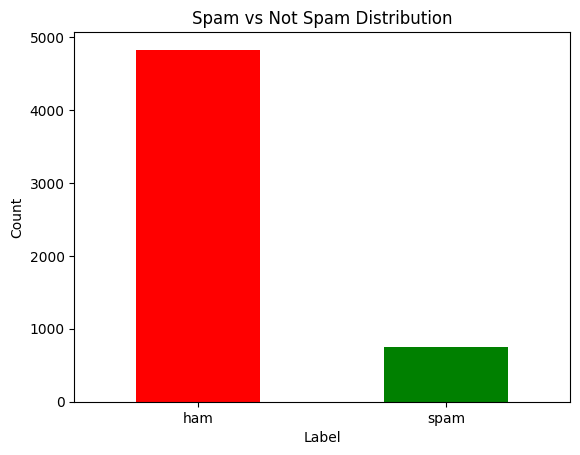

In [5]:
# Plot label distribution
spam['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Spam vs Not Spam Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Preprocess the Text

In [6]:
# Preprocessing the text data
ps = PorterStemmer()
corpus = []

for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Show first 5 preprocessed texts
print(corpus[:5])


['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though']


Create Bag of Words Model

In [7]:
# Creating Bag of Words
cv = CountVectorizer(max_features=4000)
X = cv.fit_transform(corpus).toarray()

# Prepare target variable
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values


Train-Test Split

In [8]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


Train Models

In [9]:
# Train models
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

model3 = MultinomialNB()
model3.fit(X_train, Y_train)


MultinomialNB()

Make Predictions

In [10]:
# Make predictions
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)


Evaluate Models (Confusion Matrices)

In [11]:
# Random Forest Confusion Matrix
cm1 = confusion_matrix(Y_test, pred1)
print("Random Forest Confusion Matrix: \n", cm1)
print("Random Forest Accuracy: ", accuracy_score(Y_test, pred1))

# Decision Tree Confusion Matrix
cm2 = confusion_matrix(Y_test, pred2)
print("Decision Tree Confusion Matrix: \n", cm2)
print("Decision Tree Accuracy: ", accuracy_score(Y_test, pred2))

# Multinomial Naive Bayes Confusion Matrix
cm3 = confusion_matrix(Y_test, pred3)
print("Multinomial Naive Bayes Confusion Matrix: \n", cm3)
print("Multinomial Naive Bayes Accuracy: ", accuracy_score(Y_test, pred3))


Random Forest Confusion Matrix: 
 [[966   0]
 [ 23 126]]
Random Forest Accuracy:  0.979372197309417
Decision Tree Confusion Matrix: 
 [[956  10]
 [ 20 129]]
Decision Tree Accuracy:  0.9730941704035875
Multinomial Naive Bayes Confusion Matrix: 
 [[953  13]
 [  9 140]]
Multinomial Naive Bayes Accuracy:  0.9802690582959641


 Plot Confusion Matrices

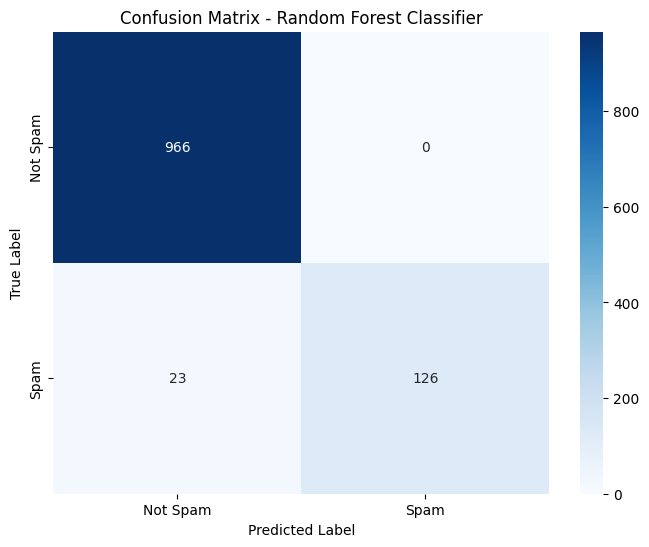

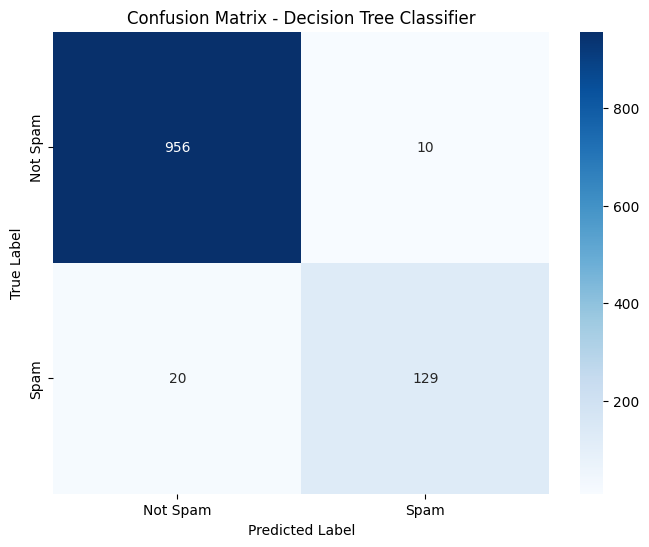

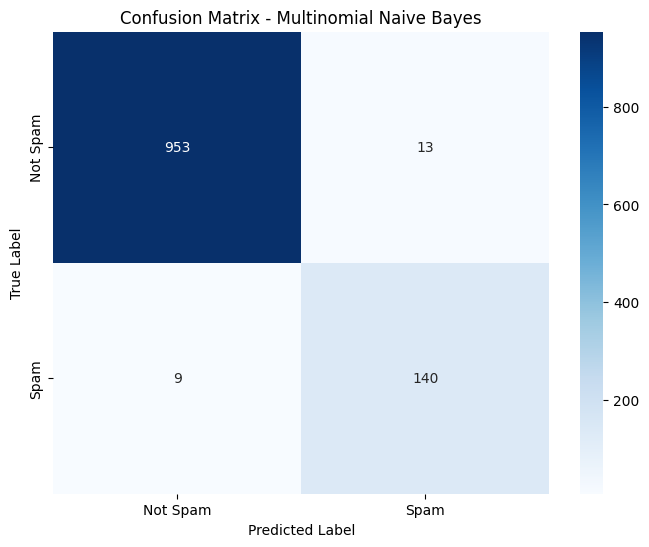

In [12]:
# Random Forest Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Multinomial Naive Bayes Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Plot Model Accuracy Comparison

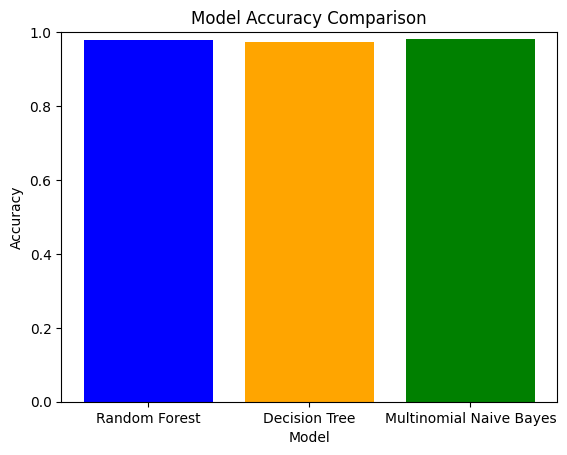

In [13]:
# Model accuracy comparison
accuracies = {
    'Random Forest': accuracy_score(Y_test, pred1),
    'Decision Tree': accuracy_score(Y_test, pred2),
    'Multinomial Naive Bayes': accuracy_score(Y_test, pred3)
}

plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


Print Classification Reports

In [14]:
# Classification reports
report1 = classification_report(Y_test, pred1)
print("Classification Report for Random Forest: \n", report1)

report2 = classification_report(Y_test, pred2)
print("Classification Report for Decision Tree: \n", report2)

report3 = classification_report(Y_test, pred3)
print("Classification Report for Multinomial Naive Bayes: \n", report3)

print("\nBest Model: Multinomial Naive Bayes")


Classification Report for Random Forest: 
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       966
        True       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

       False       0.98      0.99      0.98       966
        True       0.93      0.87      0.90       149

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for Multinomial Naive Bayes: 
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       966
        True       0.92      0.94      0.93       149

    accuracy                           0.98

Save Models

In [15]:
# Save models
filename = "RFC.pkl"
pickle.dump(model1, open(filename, 'wb'))

filename = "DTC.pkl"
pickle.dump(model2, open(filename, 'wb'))

filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))

pickle.dump(cv, open("cv.pkl", "wb"))  # Save the CountVectorizer

print("Saved all models.")


Saved all models.


Load Model and Preprocess New Email

In [16]:
# Load saved models
model = pickle.load(open("MNB.pkl", "rb"))
cv = pickle.load(open("cv.pkl", "rb"))

# Preprocessing function
def preprocess_text(text):
    ps = PorterStemmer()
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    return ' '.join(review)


Predict New Email Text

In [17]:
# Input email
email_text = "Congratulations! You have won a $1,000 gift card!"

# Preprocess
processed_email = preprocess_text(email_text)

# Convert to Bag of Words
email_vector = cv.transform([processed_email]).toarray()

# Prediction
prediction = model.predict(email_vector)
print("Prediction: Spam" if prediction[0] == 1 else "Prediction: Not Spam")


Prediction: Spam
